In [ ]:
# https://www.youtube.com/watch?v=rO_cqa4x60o
# description: this program uses the 3 moving average crossover strategy
# to determine when to buy and sell stock

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
# load the data
import pandas_datareader
import datetime
import pandas_datareader.data as web

start = datetime.datetime(2019, 11, 18)
end = datetime.datetime(2020, 6, 9)
tesla = web.DataReader('TSLA', 'yahoo', start, end)
tesla

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-11-18,70.629997,69.220001,70.584000,69.998001,22002000,69.998001
2019-11-19,71.998001,69.559998,70.349998,71.903999,38624000,71.903999
2019-11-20,72.239998,69.914001,72.000000,70.444000,33625500,70.444000
2019-11-21,72.167999,70.800003,70.902000,70.966003,30550000,70.966003
2019-11-22,68.199997,66.000000,68.031998,66.608002,84353000,66.608002
...,...,...,...,...,...,...
2020-06-03,179.587997,176.020004,177.623993,176.591995,39747500,176.591995
2020-06-04,179.149994,171.688004,177.975998,172.876007,44438500,172.876007
2020-06-05,177.304001,173.240005,175.567993,177.132004,39059500,177.132004


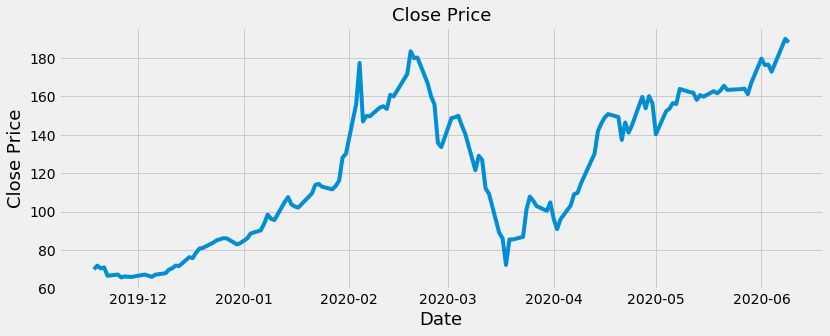

In [5]:
# visualize the closing price
plt.figure(figsize=(12.2, 4.5))
plt.title('Close Price', fontsize=18)
plt.plot(tesla.Close)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.show()

In [6]:
# calculate the 3 moving averages
# calculate the short/fast exponential moving average
shortEMA = tesla.Close.ewm(span=5, adjust=False).mean()
# calculate the medium exponential moving average
mediumEMA = tesla.Close.ewm(span=21, adjust=False).mean()
# calculate the long/slow exponential moving average
longEMA = tesla.Close.ewm(span=63, adjust=False).mean()

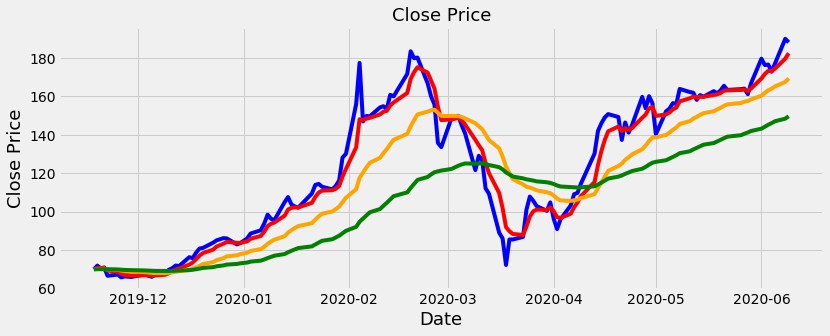

In [7]:
# visualize the closing price and the exponential moving averages
plt.figure(figsize=(12.2, 4.5))
plt.title('Close Price', fontsize=18)
plt.plot(tesla.Close, label='Close Price', color='blue')
plt.plot(shortEMA, label='Short/Fast EMA', color='red')
plt.plot(mediumEMA, label='Medium EMA', color='orange')
plt.plot(longEMA, label='Long EMA', color='green')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.show()

In [9]:
# add the exponential moving averages to the dataset
tesla['Short'] = shortEMA
tesla['Medium'] = mediumEMA
tesla['Long'] = longEMA

In [10]:
# show the dataframe
tesla

,High,Low,Open,Close,Volume,Adj Close,Short,Medium,Long
Date,,,,,,,,,
2019-11-18,70.629997,69.220001,70.584000,69.998001,22002000,69.998001,69.998001,69.998001,69.998001
2019-11-19,71.998001,69.559998,70.349998,71.903999,38624000,71.903999,70.633334,70.171274,70.057564
2019-11-20,72.239998,69.914001,72.000000,70.444000,33625500,70.444000,70.570223,70.196067,70.069640
2019-11-21,72.167999,70.800003,70.902000,70.966003,30550000,70.966003,70.702150,70.266061,70.097651
2019-11-22,68.199997,66.000000,68.031998,66.608002,84353000,66.608002,69.337434,69.933510,69.988600
...,...,...,...,...,...,...,...,...,...
2020-06-03,179.587997,176.020004,177.623993,176.591995,39747500,176.591995,173.301140,163.168326,145.231363
2020-06-04,179.149994,171.688004,177.975998,172.876007,44438500,172.876007,173.159429,164.050842,146.095258
2020-06-05,177.304001,173.240005,175.567993,177.132004,39059500,177.132004,174.483621,165.240039,147.065156


In [13]:
# create the function to buy and sell the stock
def trade(data):
    buys = []
    sells = []
    flag_long = False
    flag_short = False
    
    for i in range(0, len(data)):
        if data['Medium'][i] < data['Long'][i] and data['Short'][i] < data['Medium'][i] and flag_long == False and flag_short == False:
            # buy short
            buys.append(data.Close[i])
            sells.append(np.nan)
            flag_short = True
        elif flag_short == True and data['Short'][i] > data['Medium'][i]:
            # sell short
            sells.append(data.Close[i])
            buys.append(np.nan)
            flag_short = False
        elif data['Medium'][i] > data['Long'][i] and data['Short'][i] > data['Medium'][i] and flag_long == False and flag_short == False:
            # buy long
            buys.append(data.Close[i])
            sells.append(np.nan)
            flag_long = True
        elif flag_long == True and data['Short'][i] < data['Medium'][i]:
            # sell long
            sells.append(data.Close[i])
            buys.append(np.nan)
            flag_long = False
        else:
            sells.append(np.nan)
            buys.append(np.nan)

    return (buys, sells)

In [14]:
# add the buy and sell signals to the dataset
buy, sell = trade(tesla)
tesla['Buy'] = buy
tesla['Sell'] = sell

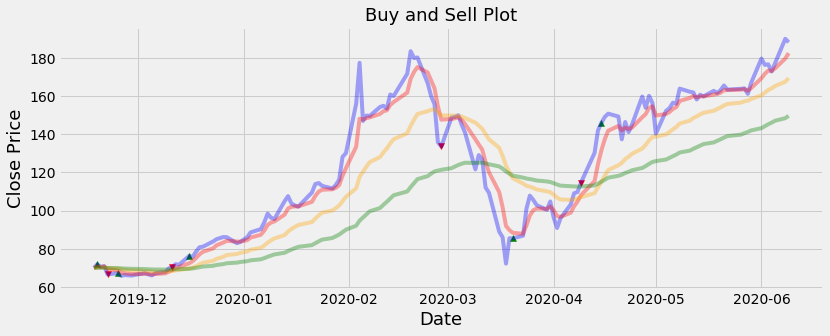

In [16]:
# visualize the stock buy and sell signals
plt.figure(figsize=(12.2, 4.5))
plt.title('Buy and Sell Plot', fontsize=18)
plt.plot(tesla.Close, label='Close Price', color='blue', alpha=0.35)
plt.plot(shortEMA, label='Short/Fast EMA', color='red', alpha=0.35)
plt.plot(mediumEMA, label='Medium EMA', color='orange', alpha=0.35)
plt.plot(longEMA, label='Long EMA', color='green', alpha=0.35)
plt.scatter(tesla.index, tesla.Buy, color='green', marker='^', alpha=1)
plt.scatter(tesla.index, tesla.Sell, color='red', marker='v', alpha=1)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.show()